---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools (2024/2025) - Lab Assignment 3</font>
---

Last updated on 2024-10-14

Please report any bugs to luis.lago@uam.es



---

This third lab includes the following tasks:

- The implementation of simple models using [PyTorch](https://pytorch.org/).

- The implementation of recurrent neural networks using [PyTorch](https://pytorch.org/), and their application to a language modeling problem.

### <font color="#CA3532">Clone the lab's github repo</font>

The easiest way of having all the lab material available from *Colab* is to clone our github repository:

In [1]:
!git clone https://github.com/luisferuam/DLFBT-LAB

Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 163 (delta 17), reused 22 (delta 6), pack-reused 128 (from 1)
Receiving objects: 100% (163/163), 7.63 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (82/82), done.


### <font color="#CA3532">Instructions</font>

- The assignment must be done in pairs.

- All the exercises are described in this notebook. You must code your solutions in the file ``dlfbt_lab3.py`` provided as part of the material. Just complete the sections in the code marked with ``TO-DO`` comments.

- The results for exercises 3 and 4 must be included at the end of this notebook.

- Create a zip file containing both the ``dlfbt_lab3.py`` and this notebook and upload it to the [course Moodle page](https://posgrado.uam.es/course/view.php?id=62684) before the due date.

- **Due date:** Friday, 2024-10-25, 23:59.

### <font color="#CA3532">Import the libraries</font>

The following code cells import the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

from time import time
import shutil

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import torch

In [5]:
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

### <font color="#CA3532">Introduction to PyTorch</font>

[PyTorch](https://pytorch.org/) is an open source machine learning framework that can be a good alternative to [TensorFlow](https://www.tensorflow.org/). It is usually the preferred option amongst the academic comunity because it offers more flexibility and hence it is easier to build custom models. However it lacks a high level layer like [Keras](https://keras.io/), so development could be a bit harder.

In this first part of the lab you will be introduced to the PyTorch framework.

Follow the introductory tutorial in the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) and then solve the exercises.


### <font color="#CA3532">Automatic differentiation with PyTorch</font>

As you have seen in the tutorial, the flag ``requires_grad=True`` is used when creating a tensor to indicate that we will compute gradients with respect to it:

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Now, whenever we perform an operation with this tensor, the new tensor that results from this operation includes a function to compute the gradient (``grad_fn``):

In [ ]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Another example follows:

In [ ]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


To compute the gradients we must run the *backward pass* on the output tensor:

In [ ]:
out.backward()

And then we can access the gradient using the ``grad`` field:

In [ ]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


A simpler example, with scalar variables $x$ and $y$, follows:

$$
z = 2x^{2}y
$$

In [ ]:
x = torch.tensor(2., requires_grad=True)
print(x)
y = torch.tensor(3., requires_grad=True)
print(y)
z = 2*x*x*y
print(z)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(24., grad_fn=<MulBackward0>)


Backward pass:

In [ ]:
z.backward()

Gradients:

$$
\frac{dz}{dx} = 4xy
$$

$$
\frac{dz}{dy} = 2x^{2}
$$


In [ ]:
print(x.grad)
print(y.grad)

tensor(24.)
tensor(8.)


### <font color="#CA3532">Exercise 1: Gradient descent to find the minimum of a function</font>

In the file ``dlfbt_lab3.py``, complete the code of the function ``gradient_descent_pytorch(f, x0, learning_rate, niters)`` that finds a minimum of a function using gradient descent. The function receives the following arguments:

- ``f``: the function to minimize
- ``x0``: the initial value
- ``learning_rate``: the learning rate
- ``niters``: the number of iterations

The function returns a Numpy array with all the values of $x$.

You can run the following code to test your implementation.


In [ ]:
from dlfbt_lab3 import gradient_descent_pytorch

Find the mimimum of the function $f(x) = (x-4)^{2}$:

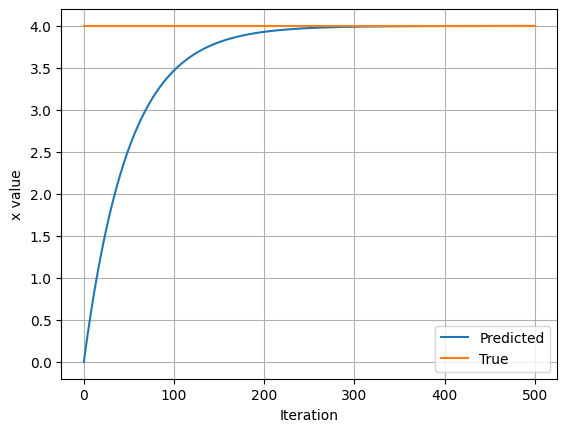

In [ ]:
f = lambda x : (x - 4)**2
x_history = gradient_descent_pytorch(f, 0.0, 1.e-2, 500)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 500], [4, 4])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Find a local mimimum of the function $f(x) = \cos x$:

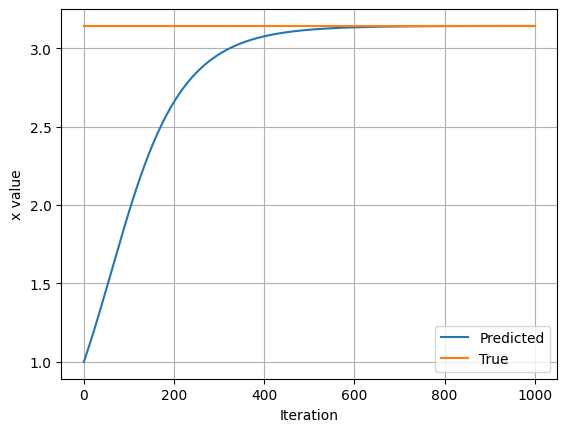

In [ ]:
f = lambda x : torch.cos(x)
x_history = gradient_descent_pytorch(f, 1.0, 1.e-2, 1000)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 1000], [np.pi, np.pi])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

### <font color="#CA3532">Exercise 2: Linear regression using pytorch</font>

Re-implement the ``LinearRegressionModel`` class of lab 1 using PyTorch.

Complete the code of the class ``LinearRegressionModel_pytorch`` by filling all the ``TO-DO`` blocks, so that it implements a Linear Regression model.

In [ ]:
from dlfbt_lab3 import LinearRegressionModel_pytorch

Run the following tests to check your implementation.

Test the ``predict`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

y = linrm.predict(dg.x).detach()

tol = 1.e-8
assert y.shape == (500, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

Test the ``compute_gradients`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_pytorch()
linrm.w = torch.tensor(dg.a, requires_grad=True)
linrm.b = torch.tensor(dg.b, requires_grad=True)

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.00704326) < tol
assert dw.shape == (4, 1)
assert np.abs(dw[0][0] + 0.05353578) < tol
assert np.abs(dw[1][0] + 0.03276935) < tol
assert np.abs(dw[2][0] + 0.00337341) < tol
assert np.abs(dw[3][0] + 0.03293776) < tol

Test the ``fit`` method:

In [ ]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_pytorch(2)
linrm.w = torch.tensor([[-2.0], [-2.0]], dtype=torch.float64, requires_grad=True)
linrm.b = torch.tensor([[-3.0]], dtype=torch.float64, requires_grad=True)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)

tol = 1.e-8
assert np.abs(loss[-1] - 2.660068435196912) < tol

Plot loss vs iteration:

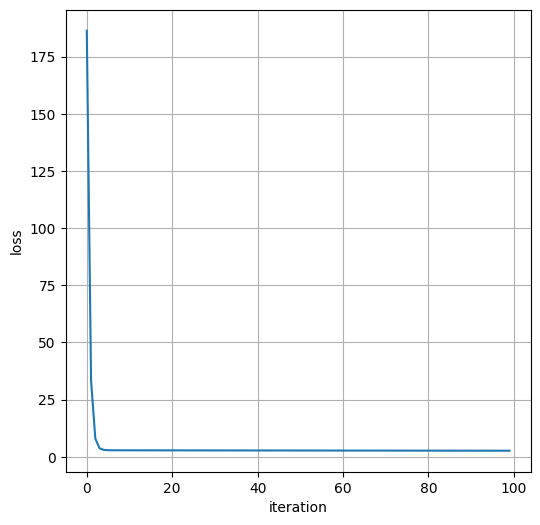

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

### <font color="#CA3532">Neural networks in pytorch</font>



We will build a simple feedforward neural network to classify the digits in the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The next cell loads the data:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Definition of a class that implements the neural network (only the forward pass):

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # Note that we are not explicitly applying a softmax function
        return x

NN instantiation:

In [ ]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


Network parameters:

In [ ]:
params = list(net.parameters())
print(len(params))

for p in params:
  print(p.size())

4
torch.Size([64, 784])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Let us apply this network to a sample image:

(28, 28)
target = 0


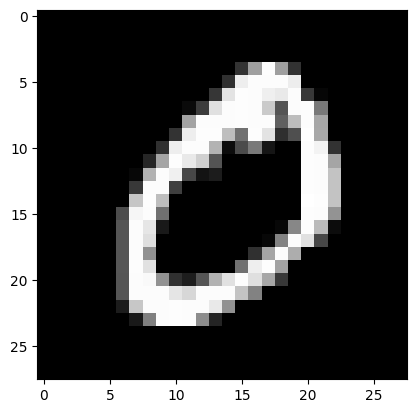

tensor([[ -6.1568,   9.8986,  29.4698, -17.9469,   3.1599,  -3.5657,  -4.7700,
         -13.6695,  24.1064, -19.8155]], grad_fn=<AddmmBackward0>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Define the optimizer:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Network training:

In [ ]:
niters = 1000
hh = []
for it in range(niters):
    # Generate random mini-batch:
    ix = np.random.permutation(60000)[:1000]
    x = torch.tensor(train_images[ix], dtype=torch.float)
    y = torch.tensor(train_labels[ix], dtype=torch.long)

    # Reset gradients:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, y)

    # Backward pass:
    loss.backward()

    # Update:
    optimizer.step()

    # Print stats:
    print('[%d] loss: %.3f' % (it + 1, loss.item()))
    hh.append(loss.item())

[1] loss: 39.743
[2] loss: 48.984
[3] loss: 49.328
[4] loss: 46.814
[5] loss: 22.236
[6] loss: 2.961
[7] loss: 2.078
[8] loss: 2.038
[9] loss: 2.139
[10] loss: 2.118
[11] loss: 2.095
[12] loss: 2.127
[13] loss: 2.104
[14] loss: 2.102
[15] loss: 2.070
[16] loss: 2.061
[17] loss: 2.037
[18] loss: 1.992
[19] loss: 1.966
[20] loss: 2.057
[21] loss: 1.944
[22] loss: 1.904
[23] loss: 1.850
[24] loss: 1.860
[25] loss: 1.806
[26] loss: 1.867
[27] loss: 1.730
[28] loss: 1.680
[29] loss: 1.852
[30] loss: 1.861
[31] loss: 1.786
[32] loss: 1.762
[33] loss: 1.722
[34] loss: 1.668
[35] loss: 1.794
[36] loss: 1.795
[37] loss: 1.710
[38] loss: 1.630
[39] loss: 1.726
[40] loss: 1.723
[41] loss: 1.640
[42] loss: 1.719
[43] loss: 1.632
[44] loss: 1.605
[45] loss: 1.610
[46] loss: 1.595
[47] loss: 1.585
[48] loss: 1.526
[49] loss: 1.592
[50] loss: 1.478
[51] loss: 1.578
[52] loss: 1.480
[53] loss: 1.608
[54] loss: 1.498
[55] loss: 1.450
[56] loss: 1.479
[57] loss: 1.487
[58] loss: 1.407
[59] loss: 1.434
[

Plot:

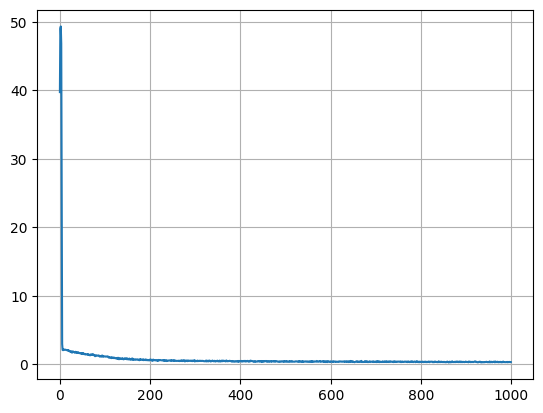

In [ ]:
plt.plot(hh)
plt.grid(True)
plt.show()

Let us classify the same image after training:

(28, 28)
target = 0


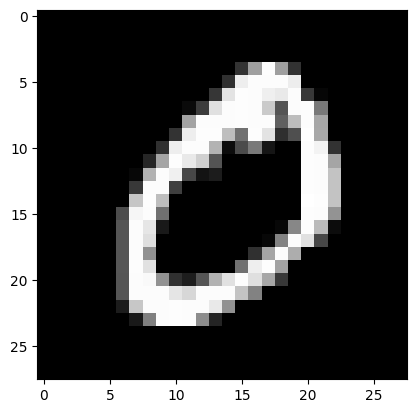

tensor([[ 16.7177,  -9.5891,   5.2113,  -4.3485,   0.0986,   3.7959,   3.3920,
           8.1764, -12.6352,  -3.2900]], grad_fn=<AddmmBackward0>)


In [ ]:
print(train_images[1].shape)
print("target =", train_labels[1])
plt.imshow(train_images[1], cmap='gray')
plt.show()

# Image to tensor:
input = torch.tensor(train_images[1], dtype=torch.float)

# Predict:
out = net(input)
print(out)

Now the highest output is assigned to the correct target.

Accuracy on training data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9147166666666666

Accuracy on test data:

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9139

PyTorch offers some utilities to process batches of data:


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader

Let us build ``DataLoader``s for training and test data:

In [ ]:
tensor_x = torch.tensor(train_images, dtype=torch.float)
tensor_y = torch.tensor(train_labels, dtype=torch.long)
train_dataset = TensorDataset(tensor_x, tensor_y)
train_dataloader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

tensor_x = torch.tensor(test_images, dtype=torch.float)
tensor_y = torch.tensor(test_labels, dtype=torch.long)
test_dataset = TensorDataset(tensor_x,tensor_y)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=True)

New network:

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Reimplement the training loop using epochs and batches:

In [ ]:
nepochs = 10
hh = []
for it in range(nepochs):
  rloss = 0.0
  for x, t in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(x)
    loss = criterion(outputs, t)

    # Backward pass:
    loss.backward()

    # Actualización de los pesos:
    optimizer.step()

    # Acumulo loss:
    rloss += loss.item()

  # Imprimir loss de la época:
  print('[%d] loss: %.3f' % (it + 1, rloss))
  hh.append(rloss)

[1] loss: 177.622
[2] loss: 45.871
[3] loss: 28.999
[4] loss: 22.808
[5] loss: 19.599
[6] loss: 18.024
[7] loss: 16.901
[8] loss: 15.869
[9] loss: 15.153
[10] loss: 14.870


Accuracy on training and test data:

In [ ]:
input = torch.tensor(train_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == train_labels).sum() / 60000

0.9292

In [ ]:
input = torch.tensor(test_images, dtype=torch.float)
out = net(input)
_, predicted = torch.max(out, 1)
(predicted.numpy() == test_labels).sum() / 10000

0.9297

### <font color="#CA3532">Exercise 3: Recurrent Neural Networks with pytorch</font>

Complete the code of the classes ``RNN`` and ``LSTM`` in the file ``dlfbt_lab3.py``. Then run the following code to test your implementation.





Dataset creation:

In [163]:
def create_data_set(n, seq_len, pattern):
  x = np.random.randint(0, 2, (n, seq_len))

  x_as_string = [''.join([chr(c+48) for c in a]) for a in x]
  t = np.array([pattern in s for s in x_as_string])*1

  return x, x_as_string, t

In [164]:
n = 50000
seq_len = 25
pattern = '11011'

x, x_as_string, t = create_data_set(n, seq_len, pattern)
xval, xval_as_string, tval = create_data_set(n, seq_len, pattern)

for s, c in zip(x_as_string[:20], t[:20]):
  print(s, c)

print('Class mean (training):', t.mean())
print('Class mean (validation):', tval.mean())

0101111011111110000011100 1
1000010010101010011000000 0
1001100101010100001011000 0
1101010110111110111101011 1
0110000101011011111000000 1
1011100111100111001011001 0
1000111001100001010110010 0
0010001011010010111000101 0
1001000000011111011010001 1
0111100111011010101110000 1
1111010100110000101100111 0
0000101000001110110011101 1
1010101111100010001110110 1
1011011111110101010011010 1
1111111001101100110000011 1
0000001101011001001011001 0
1011000110110011101100100 1
1000010110011000011001111 0
0001001100100101000011011 1
1001111110001010111010100 0
Class mean (training): 0.46882
Class mean (validation): 0.46852


In [165]:
print(x.shape)
print(t.shape)

(50000, 25)
(50000,)


Data loader for generating batches:

In [166]:
batch_size = 32

tensor_x = torch.tensor(x, dtype=torch.float)
tensor_t = torch.tensor(t, dtype=torch.long)
train_dataset = TensorDataset(tensor_x[:, :, None], tensor_t)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Test for the RNN implementation:

In [168]:
from dlfbt_lab3 import RNN

In [ ]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()

        self.rnn = RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden):
        x = self.rnn(input, hidden)
        output = self.h2o(x)

        return output

In [ ]:
hidden_size = 10
net = Network(1, hidden_size, 2)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
nepochs = 10
hh = []
acc = []
for it in range(nepochs):
  rloss = 0.0
  racc = 0.0
  for xbatch, tbatch in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(xbatch, torch.zeros(xbatch.shape[0], hidden_size))
    loss = criterion(outputs, tbatch)

    # Backward pass:
    loss.backward()

    # Weights update:
    optimizer.step()

    # Loss:
    rloss += loss.item()

    # Accuracy:
    preds = np.argmax(outputs.detach(), axis=1)
    racc += (preds == tbatch).numpy().mean()

  # Prints:
  rloss /= len(train_dataloader)
  racc /= len(train_dataloader)
  print('[%d] loss = %.3f, acc = %.3f' % (it + 1, rloss, racc))
  hh.append(rloss)
  acc.append(racc)

[1] loss = 0.617, acc = 0.649
[2] loss = 0.552, acc = 0.718
[3] loss = 0.171, acc = 0.935
[4] loss = 0.029, acc = 0.992
[5] loss = 0.031, acc = 0.997
[6] loss = 0.009, acc = 1.000
[7] loss = 0.006, acc = 1.000
[8] loss = 0.003, acc = 1.000
[9] loss = 0.070, acc = 0.993
[10] loss = 0.004, acc = 1.000


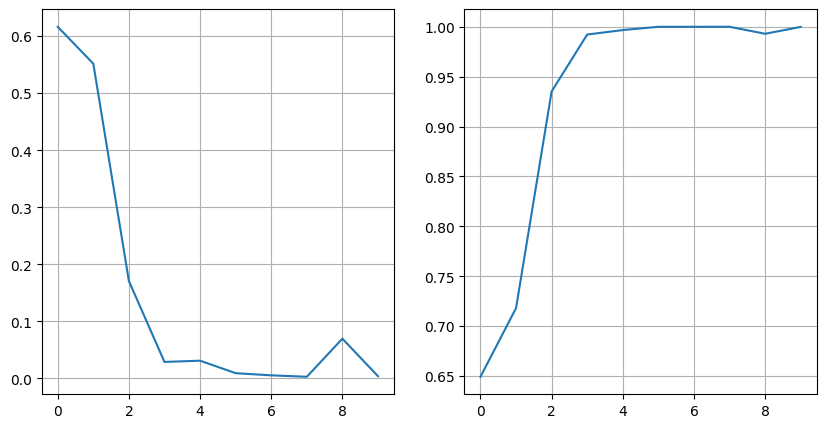

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hh)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.grid(True)
plt.show()

Test for the LSTM implementation:

In [ ]:
from dlfbt_lab3 import LSTM

In [ ]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Network, self).__init__()

        self.lstm = LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)

    def forward(self, input, hidden, cell):
        x = self.lstm(input, hidden, cell)
        output = self.h2o(x)

        return output


In [ ]:
hidden_size = 10
net = Network(1, hidden_size, 2)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [ ]:
nepochs = 10
hh = []
acc = []
for it in range(nepochs):
  rloss = 0.0
  racc = 0.0
  for xbatch, tbatch in train_dataloader:
    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    outputs = net(xbatch, torch.zeros(xbatch.shape[0], hidden_size), torch.zeros(xbatch.shape[0], hidden_size))
    loss = criterion(outputs, tbatch)

    # Backward pass:
    loss.backward()

    # Weights update:
    optimizer.step()

    # Loss:
    rloss += loss.item()

    # Accuracy:
    preds = np.argmax(outputs.detach(), axis=1)
    racc += (preds == tbatch).numpy().mean()

  # Prints:
  rloss /= len(train_dataloader)
  racc /= len(train_dataloader)
  print('[%d] loss = %.3f, acc = %.3f' % (it + 1, rloss, racc))
  hh.append(rloss)
  acc.append(racc)

[1] loss = 0.597, acc = 0.675
[2] loss = 0.348, acc = 0.842
[3] loss = 0.044, acc = 0.987
[4] loss = 0.024, acc = 0.997
[5] loss = 0.006, acc = 1.000
[6] loss = 0.003, acc = 1.000
[7] loss = 0.012, acc = 0.998
[8] loss = 0.002, acc = 1.000
[9] loss = 0.001, acc = 1.000
[10] loss = 0.000, acc = 1.000


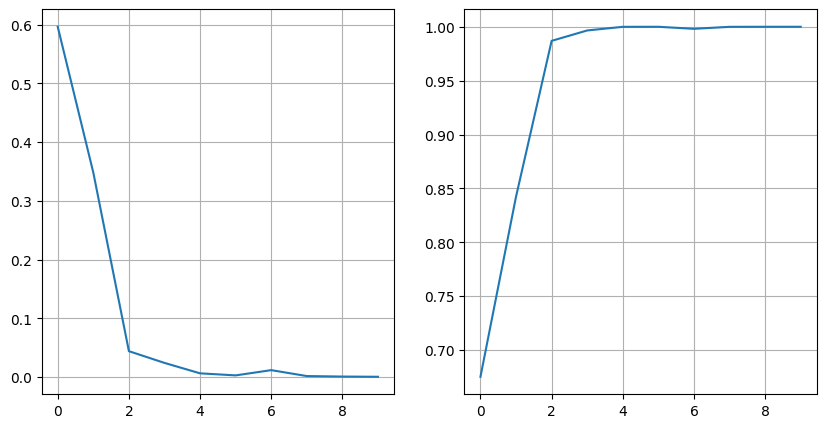

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hh)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.grid(True)
plt.show()

### <font color="#CA3532">Exercise 4: Language modeling</font>

Using PyTorch, design a recurrent neural network that can be applied to a language modeling task at the character level. The network can make use of the classes ``RNN`` and ``LSTM`` developed for exercise 3, more general classes such as ``torch.nn.RNN`` or ``torch.nn.LSTM``, available in the PyTorch library, or any other.

Include your class definition in the file ``dlfbf_lab3.py``, as class ``SequenceModelingNetwork``. Then import the class and use it to run the following examples. Depending on how you defined your network, it may be necessary to adapt the examples. Here I assume that:

1. There is only one recurrent layer with an LSTM architecture.
1. The constructor (``__init__`` method) receives the *input size*, the *hidden size* and the *output size*.
2. The ``forward`` method receives the *input* and the *hidden state* variables.

In [169]:
from dlfbt_lab3 import SequenceModelingNetwork

### Apply your network to the parity problem

As a first test, you will apply your network to the parity problem that we defined in https://luisferuam.github.io/DLFBT/recurrent_neural_networks/recurrent_neural_networks.html

This function generates the random input and output sequences:

In [183]:
def generate_sequences(n, p0, p1):
  """
  n is the number of elements in the sequence
  p0 and p1 must be probabilities, with p0 + p1 <= 1
  the probability for the $ symbol is assumed to be p$ = 1 - p0 - p1
  """
  r = np.random.rand(n)
  x_sym = np.full(n, '$')
  x = np.full(n, 2)
  x_sym[r < p0 + p1] = '1'
  x[r < p0 + p1] = 1
  x_sym[r < p0] = '0'
  x[r < p0] = 0
  x_sym[0] = '$'
  x[0] = 2
  t = np.zeros(n, dtype=int)
  k = 0
  for i in range(n):
    if x[i] == 2:
      t[i] = 0
      k = 0
    else:
      k += x[i]
      t[i] = k%2

  x_string = ''.join(x_sym)
  t_string = ''.join([chr(c+48) for c in t])

  x_one_hot = 1*(np.arange(3)[:, None] == x[None, :])

  return x, t, x_one_hot, x_string, t_string

Here we create sequences of length 5000:

In [184]:
num_pats = 5000
x, t, x_one_hot, x_string, t_string = generate_sequences(num_pats, 0.45, 0.45)

Next we define the network. Note that the input size is 3 (number of input symbols: ``0``, ``1`` or ``$``) and the output size is 2 (the parity can be either 0 or 1). The number of hidden units is arbitrary.

In [185]:
hidden_size = 10
net = SequenceModelingNetwork(3, hidden_size, 2)

Loss function and optimizer:

In [186]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

Network training:

In [187]:
nepochs = 30
seq_len = 25
hh = []
acc = []
for it in range(nepochs):
  rloss = 0.0
  racc = 0.0
  ix = 0
  state = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))
  niters = x_one_hot.transpose().shape[0] // seq_len
  while ix + seq_len <= x_one_hot.transpose().shape[0]:
    xbatch = torch.tensor(x_one_hot.transpose()[None, ix:ix+seq_len, :], dtype=torch.float)
    tbatch = torch.tensor(t[None, ix:ix+seq_len], dtype=torch.long)
    ix += seq_len

    # Reset gradients to 0:
    optimizer.zero_grad()

    # Forward pass:
    output, state = net(xbatch, state)
    state = (state[0].detach(), state[1].detach())
    loss = criterion(torch.transpose(output, 1, 2), tbatch)

    # Backward pass:
    loss.backward()

    # Weights update:
    optimizer.step()

    # Loss:
    rloss += loss.item()

    # Accuracy:
    preds = np.argmax(output.detach(), axis=2)
    racc += (preds == tbatch).numpy().mean()

  # Prints:
  rloss /= niters
  racc /= niters
  print('[%d] loss = %.3f, acc = %.3f' % (it + 1, rloss, racc))
  hh.append(rloss)
  acc.append(racc)

[1] loss = 0.678, acc = 0.558
[2] loss = 0.646, acc = 0.592
[3] loss = 0.620, acc = 0.614
[4] loss = 0.590, acc = 0.638
[5] loss = 0.543, acc = 0.701
[6] loss = 0.444, acc = 0.792
[7] loss = 0.195, acc = 0.962
[8] loss = 0.080, acc = 0.990
[9] loss = 0.046, acc = 0.997
[10] loss = 0.027, acc = 1.000
[11] loss = 0.019, acc = 1.000
[12] loss = 0.014, acc = 1.000
[13] loss = 0.011, acc = 1.000
[14] loss = 0.009, acc = 1.000
[15] loss = 0.007, acc = 1.000
[16] loss = 0.006, acc = 1.000
[17] loss = 0.005, acc = 1.000
[18] loss = 0.004, acc = 1.000
[19] loss = 0.004, acc = 1.000
[20] loss = 0.003, acc = 1.000
[21] loss = 0.003, acc = 1.000
[22] loss = 0.002, acc = 1.000
[23] loss = 0.002, acc = 1.000
[24] loss = 0.002, acc = 1.000
[25] loss = 0.002, acc = 1.000
[26] loss = 0.001, acc = 1.000
[27] loss = 0.001, acc = 1.000
[28] loss = 0.001, acc = 1.000
[29] loss = 0.001, acc = 1.000
[30] loss = 0.001, acc = 1.000


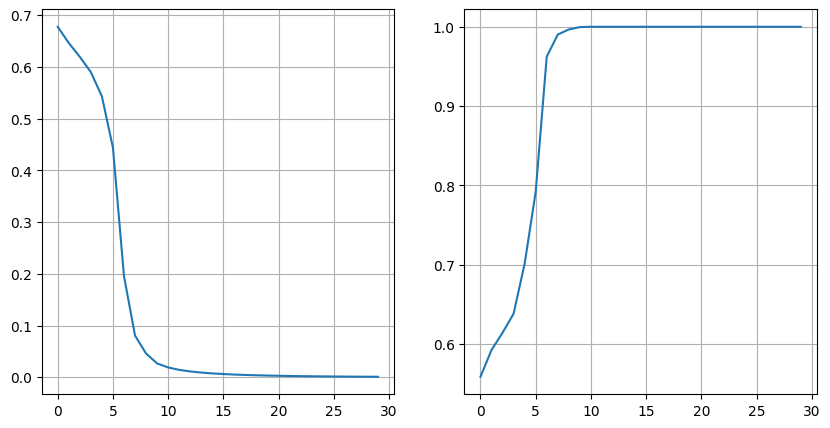

In [188]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hh)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.grid(True)
plt.show()

### Language modeling

We can use the ``SequenceModelingNetwork`` in a language modeling problem, at a character level, simply by using a text string as input and the same string, shifted one position to the left, as output.

Adapt the code in the previous example to this situation, and train a network that generates text when being input with the first character.

You can use any text string as input if it is long enough (try, for example, with the whole text of the *Don Quijote de la Mancha* novel as in https://colab.research.google.com/github/luisferuam/luisferuam.github.io/blob/master/DLFBT/recurrent_neural_networks/text_generation_quijote.ipynb).

Show examples of the generated text and comment on your results.